In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xy = np.loadtxt(r"../dataset/diabetes.csv.gz", delimiter=',',dtype=np.float32)
x_data = torch.from_numpy(xy[:,:-1])
y_data = torch.from_numpy(xy[:,[-1]])

In [3]:
# 定义模型
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.Linear1 = torch.nn.Linear(8,6)
        self.Linear2 = torch.nn.Linear(6,4)
        self.Linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.Linear1(x))
        x = self.sigmoid(self.Linear2(x))
        x = self.sigmoid(self.Linear3(x))
        return x

model = Model()

In [4]:
criterion = torch.nn.BCELoss(size_average=True)
optimiser = torch.optim.SGD(model.parameters(),lr=0.001)

d:\Learning\DeepLearning\myenv\Lib\site-packages\torch\nn\_reduction.py:51: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


第 1 轮损失为 0.6860
第 2 轮损失为 0.6860
第 3 轮损失为 0.6859
第 4 轮损失为 0.6859
第 5 轮损失为 0.6859
第 6 轮损失为 0.6858
第 7 轮损失为 0.6858
第 8 轮损失为 0.6857
第 9 轮损失为 0.6857
第 10 轮损失为 0.6857
第 11 轮损失为 0.6856
第 12 轮损失为 0.6856
第 13 轮损失为 0.6856
第 14 轮损失为 0.6855
第 15 轮损失为 0.6855
第 16 轮损失为 0.6855
第 17 轮损失为 0.6854
第 18 轮损失为 0.6854
第 19 轮损失为 0.6854
第 20 轮损失为 0.6853
第 21 轮损失为 0.6853
第 22 轮损失为 0.6853
第 23 轮损失为 0.6852
第 24 轮损失为 0.6852
第 25 轮损失为 0.6852
第 26 轮损失为 0.6851
第 27 轮损失为 0.6851
第 28 轮损失为 0.6851
第 29 轮损失为 0.6850
第 30 轮损失为 0.6850
第 31 轮损失为 0.6850
第 32 轮损失为 0.6849
第 33 轮损失为 0.6849
第 34 轮损失为 0.6849
第 35 轮损失为 0.6848
第 36 轮损失为 0.6848
第 37 轮损失为 0.6848
第 38 轮损失为 0.6847
第 39 轮损失为 0.6847
第 40 轮损失为 0.6847
第 41 轮损失为 0.6846
第 42 轮损失为 0.6846
第 43 轮损失为 0.6846
第 44 轮损失为 0.6845
第 45 轮损失为 0.6845
第 46 轮损失为 0.6845
第 47 轮损失为 0.6844
第 48 轮损失为 0.6844
第 49 轮损失为 0.6844
第 50 轮损失为 0.6843
第 51 轮损失为 0.6843
第 52 轮损失为 0.6843
第 53 轮损失为 0.6842
第 54 轮损失为 0.6842
第 55 轮损失为 0.6842
第 56 轮损失为 0.6841
第 57 轮损失为 0.6841
第 58 轮损失为 0.6841
第 59 轮损失为 0.6840
第 60 轮

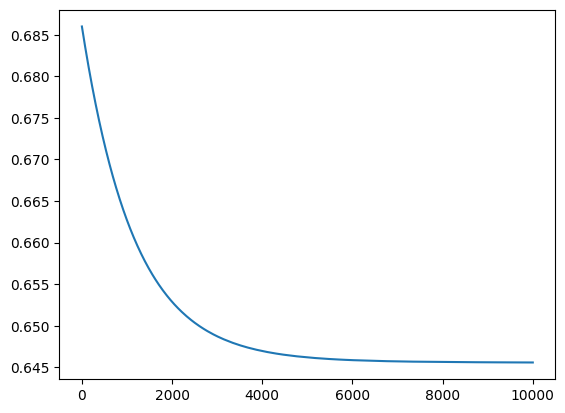

In [5]:
n = 10000
list = []
for epoch in range(n):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)

    print(f"第 {epoch+1} 轮损失为 {loss.detach().numpy():.4f}")
    list.append(loss.detach().numpy())

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

i = np.arange(1,n+1)
plt.plot(i, list)